<a href="https://colab.research.google.com/github/mrri-18/swu_3/blob/main/nutrient_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns #visualization
from sklearn.preprocessing import StandardScaler
import scipy as sp

In [109]:
#import the dataset
#데이터셋을 불러온다
dataset = pd.read_csv('/content/food111_col.csv', encoding='UTF8')
dataset.head()

,Unnamed: 0,ATT_FILE_NO_MAIN,ATT_FILE_NO_MK,HASH_TAG,INFO_CAR,INFO_ENG,INFO_FAT,INFO_NA,INFO_PRO,INFO_WGT,...,RCP_PARTS_DTLS,RCP_PAT2,RCP_SEQ,RCP_WAY2,LOW_NA,HIGH_PRO,VEGAN,LOW_FAT,LOW_CAR,LOW_ENG
0,0,http://www.foodsafetykorea.go.kr/uploadimg/coo...,http://www.foodsafetykorea.go.kr/uploadimg/coo...,연두부,3.0,220.0,17.0,99.0,14.0,NaN,...,"새우두부계란찜\n연두부 75g(3/4모), 칵테일새우 20g(5마리), 달걀 30g...",반찬,28.0,찌기,0.0,1,1,NaN,NaN,NaN
1,1,http://www.foodsafetykorea.go.kr/uploadimg/coo...,http://www.foodsafetykorea.go.kr/uploadimg/coo...,날콩가루,20.0,215.0,9.0,240.0,14.0,NaN,...,"[1인분]조선부추 50g, 날콩가루 7g(1⅓작은술)\n·양념장 : 저염간장 3g(...",반찬,29.0,찌기,0.0,1,1,NaN,NaN,NaN
2,2,http://www.foodsafetykorea.go.kr/uploadimg/coo...,http://www.foodsafetykorea.go.kr/uploadimg/coo...,방울토마토,9.0,45.0,1.0,277.0,2.0,NaN,...,"●방울토마토 소박이 : \n방울토마토 150g(5개), 양파 10g(3×1cm), ...",반찬,31.0,기타,0.0,0,1,NaN,NaN,NaN
3,3,http://www.foodsafetykorea.go.kr/uploadimg/coo...,http://www.foodsafetykorea.go.kr/uploadimg/coo...,순두부,10.0,75.0,2.0,22.0,4.0,NaN,...,"●오이무침 :\n오이 70g(1/3개), 다진 땅콩 10g(1큰술)\n●순두부사과 ...",반찬,32.0,기타,0.0,0,1,NaN,NaN,NaN
4,4,http://www.foodsafetykorea.go.kr/uploadimg/coo...,http://www.foodsafetykorea.go.kr/uploadimg/coo...,NaN,2.0,65.0,1.0,78.0,12.0,NaN,...,"북엇국\n북어채 25g(15개), 새우 10g(3마리), 사과 30g(1/5개), ...",국&찌개,33.0,끓이기,0.0,1,1,NaN,NaN,NaN


In [110]:
dataset.columns

Index(['Unnamed: 0', 'ATT_FILE_NO_MAIN', 'ATT_FILE_NO_MK', 'HASH_TAG',
       'INFO_CAR', 'INFO_ENG', 'INFO_FAT', 'INFO_NA', 'INFO_PRO', 'INFO_WGT',
       'MANUAL_IMG01', 'MANUAL_IMG02', 'MANUAL_IMG03', 'MANUAL_IMG04',
       'MANUAL_IMG05', 'MANUAL_IMG06', 'MANUAL01', 'MANUAL02', 'MANUAL03',
       'MANUAL04', 'MANUAL05', 'MANUAL06', 'RCP_NA_TIP', 'RCP_NM',
       'RCP_PARTS_DTLS', 'RCP_PAT2', 'RCP_SEQ', 'RCP_WAY2', 'LOW_NA',
       'HIGH_PRO', 'VEGAN', 'LOW_FAT', 'LOW_CAR', 'LOW_ENG'],
      dtype='object')

In [111]:
dataset.shape

(1267, 34)

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1267 non-null   int64  
 1   ATT_FILE_NO_MAIN  1105 non-null   object 
 2   ATT_FILE_NO_MK    1109 non-null   object 
 3   HASH_TAG          356 non-null    object 
 4   INFO_CAR          1267 non-null   float64
 5   INFO_ENG          1267 non-null   float64
 6   INFO_FAT          1267 non-null   float64
 7   INFO_NA           1267 non-null   float64
 8   INFO_PRO          1267 non-null   float64
 9   INFO_WGT          242 non-null    float64
 10  MANUAL_IMG01      1109 non-null   object 
 11  MANUAL_IMG02      1110 non-null   object 
 12  MANUAL_IMG03      1111 non-null   object 
 13  MANUAL_IMG04      1061 non-null   object 
 14  MANUAL_IMG05      1058 non-null   object 
 15  MANUAL_IMG06      1004 non-null   object 
 16  MANUAL01          1109 non-null   object 


In [113]:
dataset.isnull().sum()

Unnamed: 0             0
ATT_FILE_NO_MAIN     162
ATT_FILE_NO_MK       158
HASH_TAG             911
INFO_CAR               0
INFO_ENG               0
INFO_FAT               0
INFO_NA                0
INFO_PRO               0
INFO_WGT            1025
MANUAL_IMG01         158
MANUAL_IMG02         157
MANUAL_IMG03         156
MANUAL_IMG04         206
MANUAL_IMG05         209
MANUAL_IMG06         263
MANUAL01             158
MANUAL02             157
MANUAL03             156
MANUAL04             206
MANUAL05             209
MANUAL06             263
RCP_NA_TIP           210
RCP_NM                 0
RCP_PARTS_DTLS         0
RCP_PAT2             156
RCP_SEQ              156
RCP_WAY2             156
LOW_NA               156
HIGH_PRO               0
VEGAN                  0
LOW_FAT             1267
LOW_CAR             1267
LOW_ENG             1267
dtype: int64

In [114]:

# 특정 행(index)을 출력 (예시에서는 2번째 행)
specific_row = dataset.iloc[493]  # 0부터 시작하는 인덱스

# 결과 출력
print(specific_row)


Unnamed: 0                                                        493
ATT_FILE_NO_MAIN    http://www.foodsafetykorea.go.kr/uploadimg/201...
ATT_FILE_NO_MK      http://www.foodsafetykorea.go.kr/uploadimg/201...
HASH_TAG                                                          NaN
INFO_CAR                                                          6.2
INFO_ENG                                                         86.7
INFO_FAT                                                          5.9
INFO_NA                                                         577.2
INFO_PRO                                                          9.5
INFO_WGT                                                          NaN
MANUAL_IMG01        http://www.foodsafetykorea.go.kr/uploadimg/coo...
MANUAL_IMG02        http://www.foodsafetykorea.go.kr/uploadimg/coo...
MANUAL_IMG03        http://www.foodsafetykorea.go.kr/uploadimg/coo...
MANUAL_IMG04        http://www.foodsafetykorea.go.kr/uploadimg/coo...
MANUAL_IMG05        

In [115]:

# 특정 행(index)을 출력 (예시에서는 2번째 행)
specific_row = dataset.iloc[5]  # 0부터 시작하는 인덱스

# 결과 출력
print(specific_row)


Unnamed: 0                                                          5
ATT_FILE_NO_MAIN    http://www.foodsafetykorea.go.kr/uploadimg/coo...
ATT_FILE_NO_MK      http://www.foodsafetykorea.go.kr/uploadimg/coo...
HASH_TAG                                                         저염된장
INFO_CAR                                                         12.0
INFO_ENG                                                        100.0
INFO_FAT                                                          0.0
INFO_NA                                                         361.0
INFO_PRO                                                         13.0
INFO_WGT                                                          NaN
MANUAL_IMG01                                                      NaN
MANUAL_IMG02                                                      NaN
MANUAL_IMG03        http://www.foodsafetykorea.go.kr/uploadimg/coo...
MANUAL_IMG04        http://www.foodsafetykorea.go.kr/uploadimg/coo...
MANUAL_IMG05        

In [116]:
dataset[['INFO_CAR','INFO_ENG','INFO_FAT']].describe()

,INFO_CAR,INFO_ENG,INFO_FAT
count,1267.000000,1267.000000,1267.000000
mean,29.341949,253.147837,9.738011
std,61.790127,183.341981,18.350055
min,0.000000,1.000000,0.000000
25%,8.570000,119.250000,2.225000
50%,18.600000,215.000000,6.000000
75%,38.550000,342.000000,12.715000
max,1838.000000,1555.900000,505.000000


In [117]:
pca_pre_data = dataset.iloc[:,[4, 5, 6]]

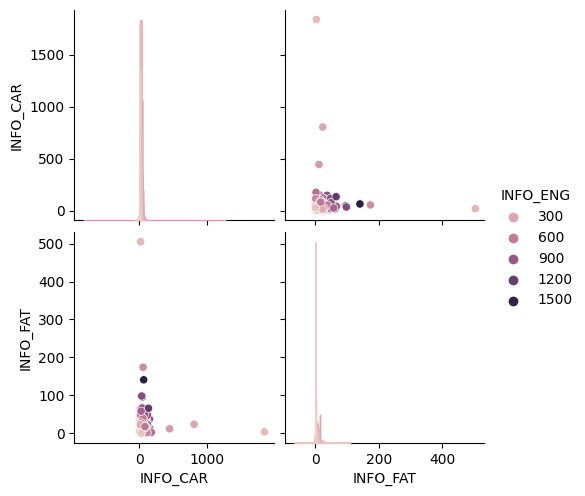

In [118]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(dataset[['INFO_CAR','INFO_ENG','INFO_FAT']],hue="INFO_ENG")
plt.show()

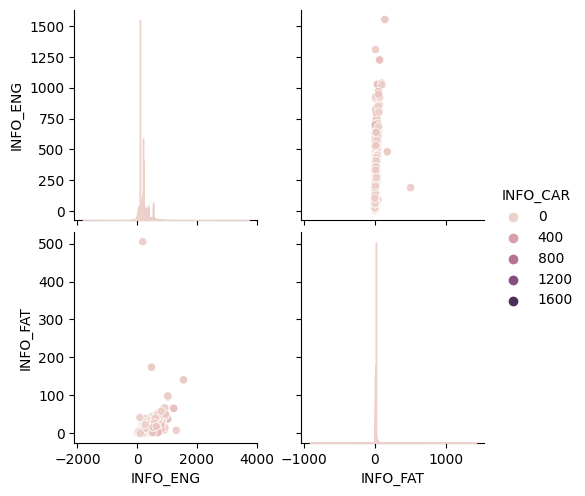

In [119]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(dataset[['INFO_CAR','INFO_ENG','INFO_FAT']],hue="INFO_CAR")
plt.show()

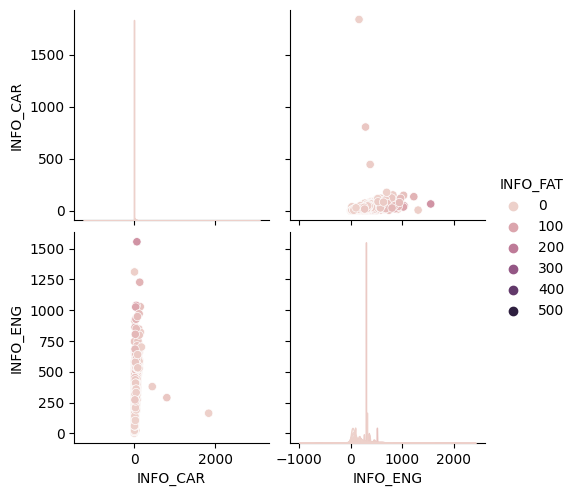

In [120]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(dataset[['INFO_CAR','INFO_ENG','INFO_FAT']],hue="INFO_FAT")
plt.show()

In [121]:
info_nu=dataset[['Unnamed: 0','INFO_CAR','INFO_ENG','INFO_FAT','INFO_NA','INFO_PRO']]
nu_df=dataset[['INFO_CAR','INFO_ENG','INFO_FAT','INFO_NA','INFO_PRO']]

In [122]:
# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
scaler.fit(pca_pre_data)
nu_scaled = scaler.transform(pca_pre_data)
#표준화 완료

In [123]:
nu_df_scaled = pd.DataFrame(data=nu_scaled, columns=['INFO_CAR','INFO_ENG','INFO_FAT'])
print('feature 들의 평균 값')
print(nu_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(nu_df_scaled.var())

feature 들의 평균 값
INFO_CAR    1.121614e-17
INFO_ENG    1.962825e-17
INFO_FAT   -5.047265e-17
dtype: float64

feature 들의 분산 값
INFO_CAR    1.00079
INFO_ENG    1.00079
INFO_FAT    1.00079
dtype: float64


In [124]:
#신뢰구간 대략 95%구간 이외의 값을 outlier
# check Z score
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in nu_df_scaled.columns:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(nu_df_scaled[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", nu_df_scaled.shape)
all_outlier_idx = sum(outlier_idx_list,[])
nu_df_scaled = nu_df_scaled.drop(all_outlier_idx)
print("After (drop outlier)", nu_df_scaled.shape)

Check INFO_CAR
INFO_CAR Has outliers
 61      12.558063
868     29.282546
925      6.736065
1133     2.002049
1245     2.400814
Name: INFO_CAR_Zscore, dtype: float64

Check INFO_ENG
INFO_ENG Has outliers
 72      4.230664
100     2.350920
105     3.602628
135     2.022988
165     2.221056
185     3.141558
230     2.100469
234     2.611738
301     2.137573
302     2.015349
323     2.271256
327     2.664120
333     2.685945
355     2.362378
436     2.200322
467     2.201413
474     2.270164
616     3.687748
625     2.195411
791     5.772109
809     3.242502
827     2.020805
830     3.075535
917     2.629198
928     2.633018
992     2.229787
993     2.172494
1012    2.324183
1019    2.400028
1105    3.121369
1113    2.209052
1133    3.098452
1145    3.318347
1162    2.723049
1179    4.289048
1184    2.969135
1192    4.215386
1196    2.147395
1197    2.328003
1199    3.676290
1204    7.108391
1218    2.223348
1220    2.097632
1223    2.499772
1224    2.120603
1226    3.256580
1240    3.916

In [125]:
#이상치 값 제거 -> 정규화, 반드시 이 순서
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
min_max_scaler = MinMaxScaler()

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
final_df_scaled = pd.DataFrame(min_max_scaler.fit_transform(nu_df_scaled),columns=['INFO_CAR','INFO_ENG','INFO_FAT'])
print('feature들의 최소 값')
print(final_df_scaled.min())
print('\nfeature들의 최대 값')
print(final_df_scaled.max())

feature들의 최소 값
INFO_CAR    0.0
INFO_ENG    0.0
INFO_FAT    0.0
dtype: float64

feature들의 최대 값
INFO_CAR    1.0
INFO_ENG    1.0
INFO_FAT    1.0
dtype: float64


In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(final_df_scaled)
print(pca_data.shape)

(1209, 2)


In [128]:
print(np.sum(pca.explained_variance_ratio_)) # 0.965...


0.9651090435761087


In [129]:
pca.explained_variance_ratio_

array([0.72183936, 0.24326968])

In [130]:
data2 = pd.DataFrame(data =pca_data, columns=['pc1', 'pc2'])

In [131]:
data2.head()

,pc1,pc2
0,-0.008424,0.267734
1,-0.028973,0.044900
2,-0.360906,-0.018882
3,-0.309776,-0.008429
4,-0.361580,0.022841


In [132]:
from sklearn.cluster import KMeans
WCSS=[]

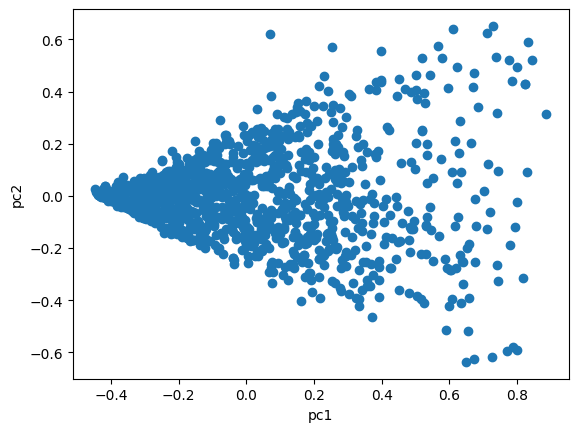

In [133]:
plt.scatter(data2['pc1'], data2['pc2'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

열량, 나트륨 수치가 range가 차이가 심해서 정규화 해야함.

In [134]:
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data2)
    interia=kmeans.inertia_
    #### inertia_ is the formula used to segregate the data points into clusters
    #### inertia = 관성
    #### Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 => 이 부분이 팔꿈치와 유사해서
    #### 이 지점의 K 값을 군집(cluster)의 개수로 사용 inertia_속성으로 확인할 수 있다
    print('k:', i, 'inertia:', interia)
    WCSS.append(kmeans.inertia_) #5개로 결정

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

k: 1 inertia: 140.35592654270988
k: 2 inertia: 68.11942790670966
k: 3 inertia: 47.764962598882846
k: 4 inertia: 34.34240027788832
k: 5 inertia: 26.79337320527616
k: 6 inertia: 21.49570259885334
k: 7 inertia: 18.66299430266939


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 8 inertia: 16.345286274368227
k: 9 inertia: 14.611771062235729
k: 10 inertia: 12.897413841608643


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


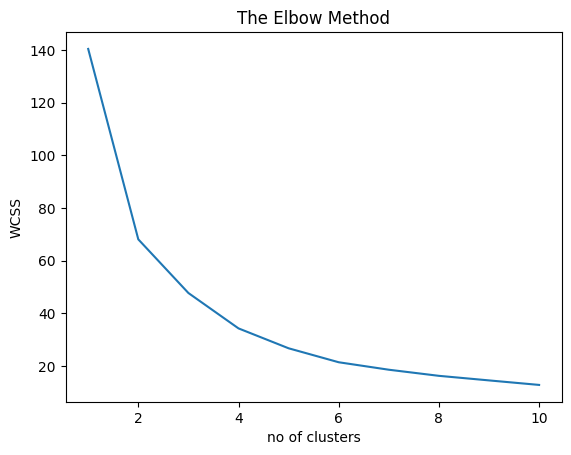

In [135]:
plt.plot(range(1,11), WCSS)

plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

In [136]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', max_iter=300, random_state=0) #K-MEANS 알고리즘을 사용, K-Means 알고리즘이 수렴할 때까지 최대 300번 반복
y_kmeans= kmeansmodel.fit_predict(data2)
y_kmeans #각 데이터에 대해 클러스터 표현 0~2까지

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, ..., 1, 2, 0], dtype=int32)

In [137]:
data2['labels'] = y_kmeans

In [153]:
final_df_scaled['labels']=y_kmeans

In [145]:
data2.head(10)

,pc1,pc2,labels
0,-0.008424,0.267734,2
1,-0.028973,0.044900,0
2,-0.360906,-0.018882,0
3,-0.309776,-0.008429,0
4,-0.361580,0.022841,0
5,-0.290156,-0.050092,0
6,-0.424217,0.000169,0
7,-0.368299,-0.007144,0
8,-0.082638,0.130631,0
9,-0.055752,-0.075881,0


In [142]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     1209 non-null   float64
 1   pc2     1209 non-null   float64
 2   labels  1209 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 23.7 KB


<Axes: xlabel='pc1', ylabel='pc2'>

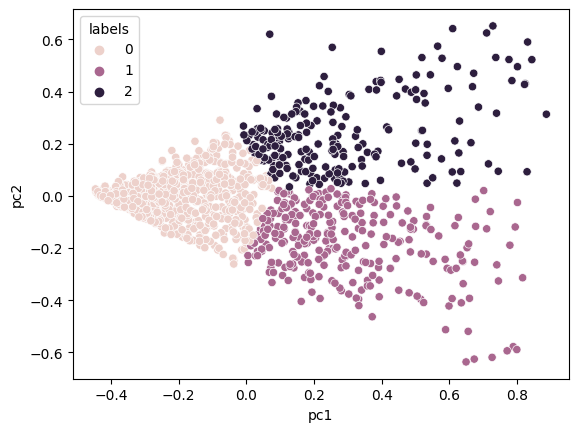

In [144]:
sns.scatterplot(x=data2['pc1'], y=data2['pc2'], hue='labels', data=data2)

In [140]:
selected_columns = data2.iloc[:, [0, 1]]

In [141]:
from sklearn.metrics import silhouette_score
k_range=range(2,10)
best_k=-1
best_sc=-1

for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=200)
  result=kmeans.fit_predict(selected_columns)
  score=silhouette_score(selected_columns,result)
  print('k: ',k,' score: ',score)
  if(score>best_sc):
    best_k=k
    best_sc=score
print('best_k: ',best_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2  score:  0.4835541952277694
k:  3  score:  0.49266943893186094


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  4  score:  0.4181355899994012
k:  5  score:  0.4539792258613073


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  6  score:  0.39061834578076343
k:  7  score:  0.3936634519125104


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  8  score:  0.39040960681514164
k:  9  score:  0.39311578574833217
best_k:  3


In [149]:
type(data2)

pandas.core.frame.DataFrame

<Axes: >

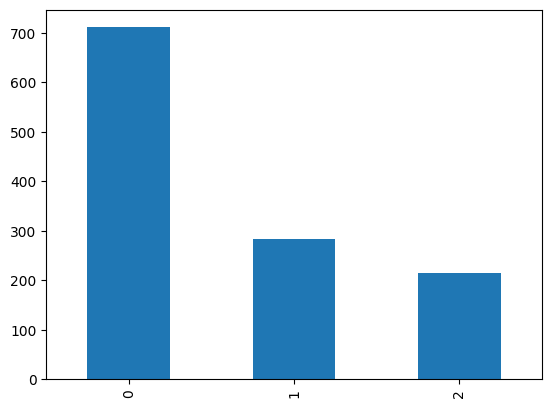

In [150]:
cluster_size=data2['labels'].value_counts()
cluster_size.plot(kind='bar')

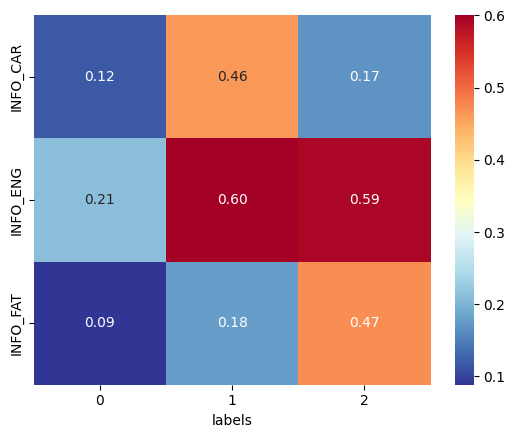

In [154]:
temp=final_df_scaled.groupby(['labels']).mean()
cluster_mean=temp.transpose()
sns.heatmap(
    cluster_mean,
    annot=True,
    fmt='.2f',
    cmap='RdYlBu_r'
)
plt.show() #라벨을 기준으로 각 칼럼들의 평균 계산, 각 칼럼마다 작은 평균값이 작은 0번 그룹을 선택한다

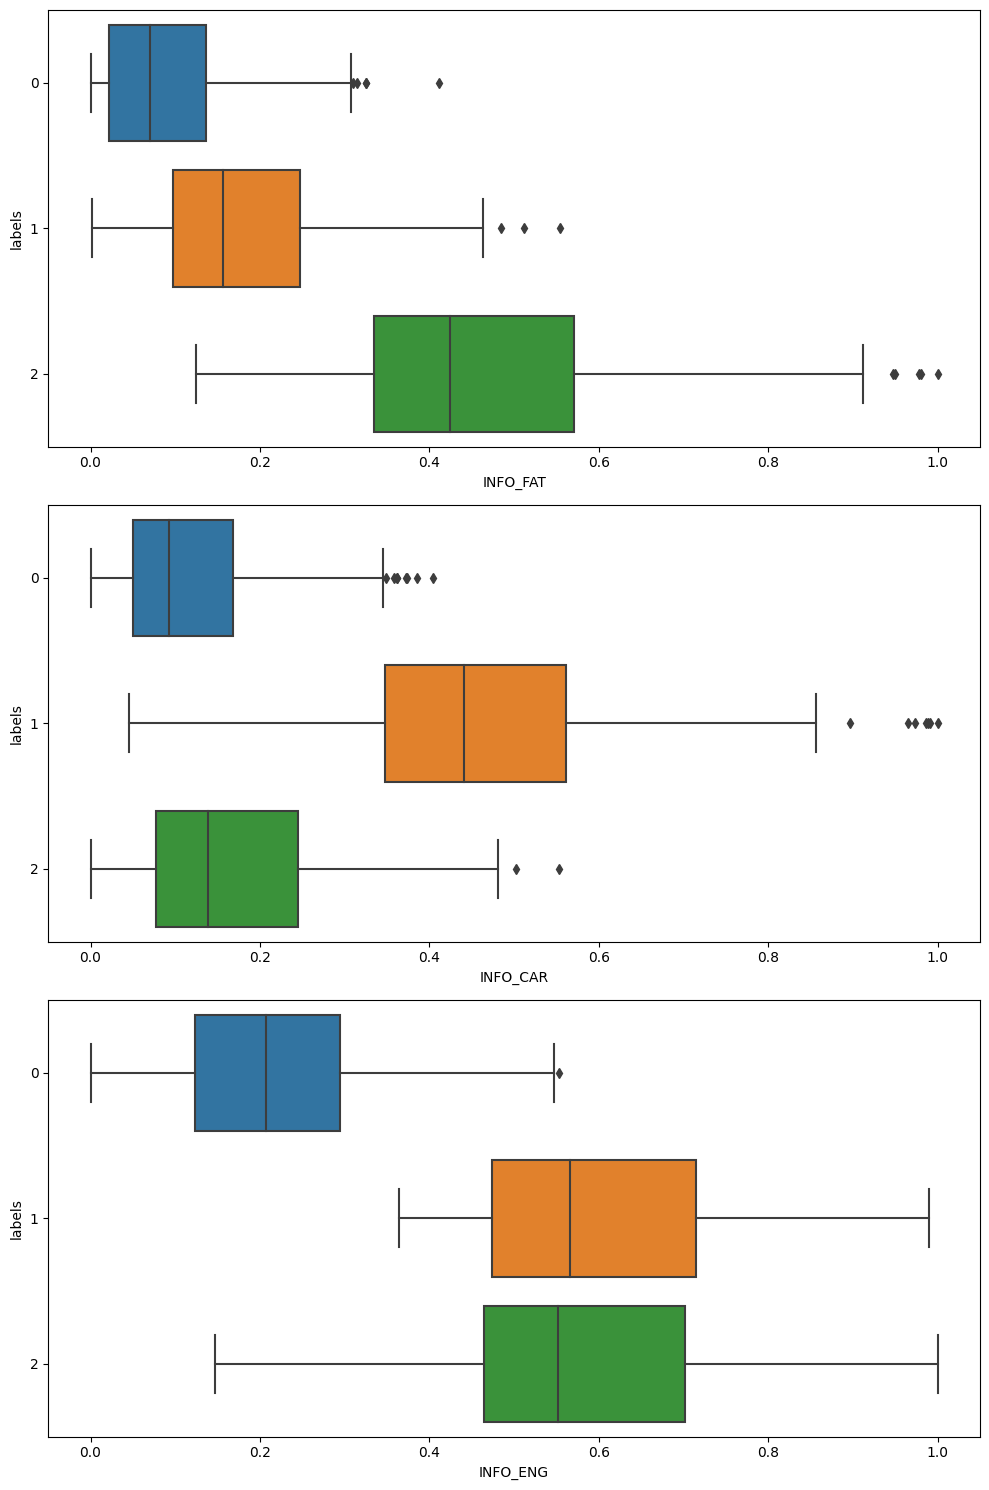

In [166]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
# INFO_FAT에 대한 boxplot
sns.boxplot(data=final_df_scaled, y='labels', x='INFO_FAT', orient='h', ax=axes[0])
axes[0].set_xlabel('INFO_FAT')

# INFO_CAR에 대한 boxplot
sns.boxplot(data=final_df_scaled, y='labels', x='INFO_CAR', orient='h', ax=axes[1])
axes[1].set_xlabel('INFO_CAR')

# INFO_ENG에 대한 boxplot
sns.boxplot(data=final_df_scaled, y='labels', x='INFO_ENG', orient='h', ax=axes[2])
axes[2].set_xlabel('INFO_ENG')

plt.tight_layout()
plt.show()